In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [21]:
Water_Spring_Madonna_di_Canneto = pd.read_csv('./datasets/Water_Spring_Madonna_di_Canneto.csv')

In [22]:
Water_Spring_Madonna_di_Canneto

,Date,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
0,01/01/2012,0.0,5.25,NaN
1,02/01/2012,5.6,6.65,NaN
2,03/01/2012,10.0,8.85,NaN
3,04/01/2012,0.0,6.75,NaN
4,05/01/2012,1.0,5.55,NaN
...,...,...,...,...
3099,26/06/2020,NaN,NaN,223.919115
3100,27/06/2020,NaN,NaN,223.861787
3101,28/06/2020,NaN,NaN,223.764382
3102,29/06/2020,NaN,NaN,223.766272


In [23]:
Water_Spring_Madonna_di_Canneto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          3104 non-null   object 
 1   Rainfall_Settefrati           2557 non-null   float64
 2   Temperature_Settefrati        2557 non-null   float64
 3   Flow_Rate_Madonna_di_Canneto  1387 non-null   float64
dtypes: float64(3), object(1)
memory usage: 97.1+ KB


In [24]:
Water_Spring_Madonna_di_Canneto.shape

(3104, 4)

### Filled Entries

<AxesSubplot:>

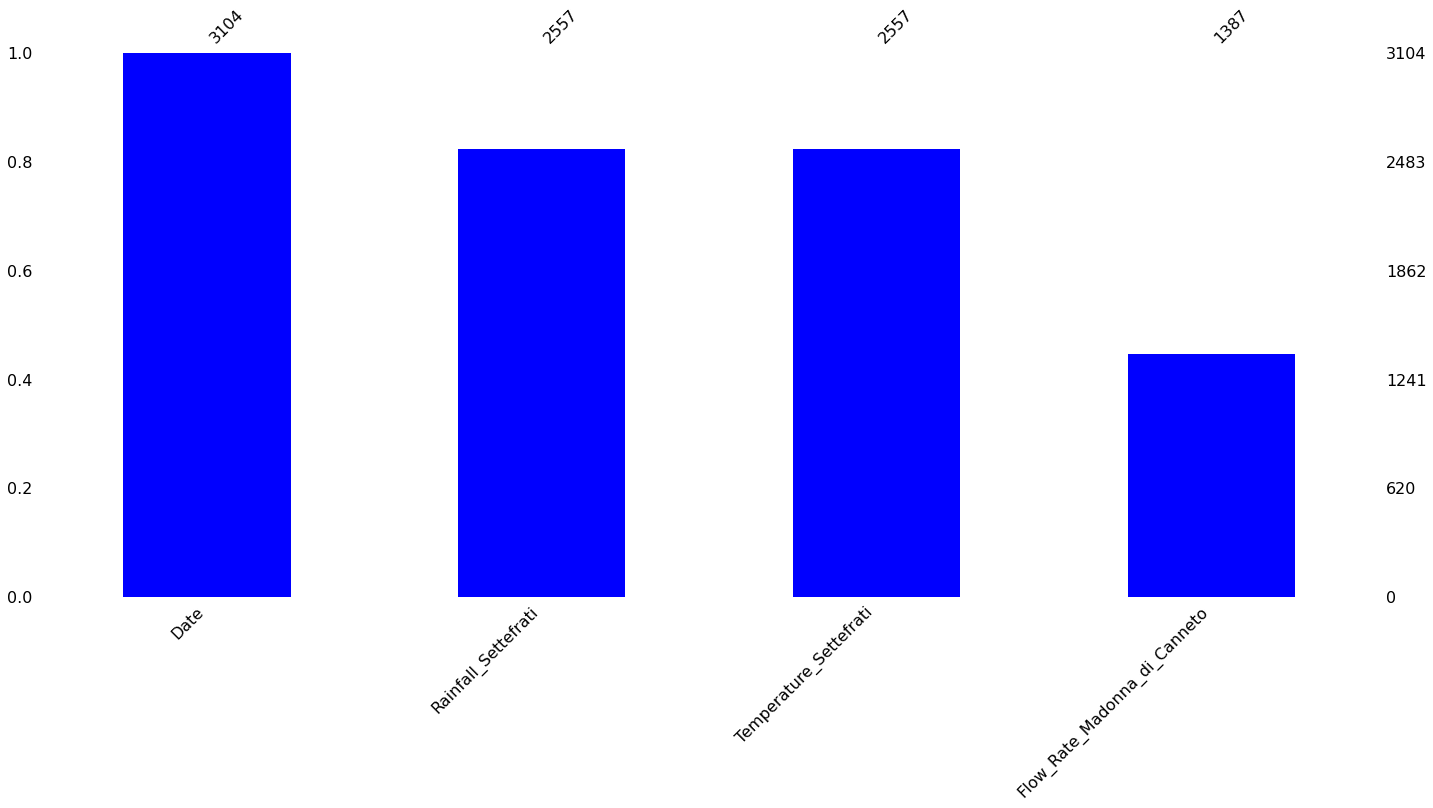

In [25]:
msno.bar(Water_Spring_Madonna_di_Canneto,color='b')

### Dates starting and ending values

In [26]:
print('starting date:', Water_Spring_Madonna_di_Canneto.Date.values[[0,-1]][0])
print('ending date:', Water_Spring_Madonna_di_Canneto.Date.values[[0,-1]][1])


starting date: 01/01/2012
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

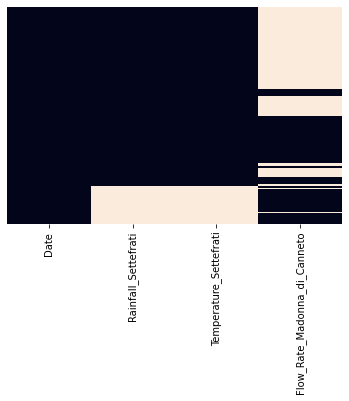

In [27]:
sns.heatmap(Water_Spring_Madonna_di_Canneto.isnull(),yticklabels=False,cbar=False)

In [28]:
data=Water_Spring_Madonna_di_Canneto.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

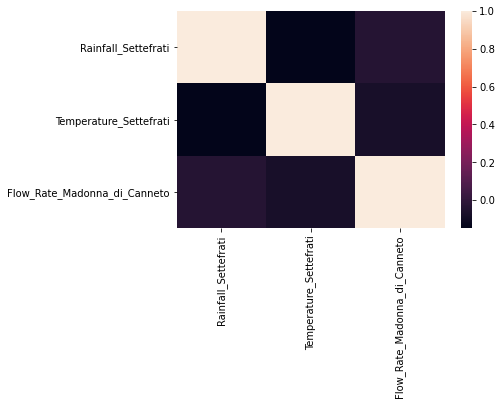

In [29]:
sns.heatmap(data.corr())

In [30]:
file = Water_Spring_Madonna_di_Canneto
features_nan=[features for features in file.columns if file[features].isnull().sum()>1 and file[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(file[feature].isnull().mean()*100,4),'% missing ')

Rainfall_Settefrati 17.6224 % missing 
Temperature_Settefrati 17.6224 % missing 
Flow_Rate_Madonna_di_Canneto 55.3157 % missing 


In [31]:
'''
Columns that are going to be dropped

No columns to be dropped

'''

'\nColumns that are going to be dropped\n\nNo columns to be dropped\n\n'

In [32]:
#Water_Spring_Madonna_di_Canneto_corr = Water_Spring_Madonna_di_Canneto.drop(['Temperature_Le_Croci'],axis=1)

In [33]:
#sns.heatmap(Water_Spring_Madonna_di_Canneto.corr())

### Imputation

Rainfall_Settefrati

In [34]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

In [35]:
x=file['Rainfall_Settefrati']
cal(x)

null_values:  
  547 
  count_values:  
  <bound method Series.unique of 0.0     1421
0.2      148
0.4       55
0.6       38
1.6       26
        ... 
93.6       1
64.3       1
42.2       1
16.9       1
68.2       1
Name: Rainfall_Settefrati, Length: 272, dtype: int64> 
  mean:  
  4.252444270629647 
  median:  
  0.0 
  mode:  
  0    0.0
dtype: float64


In [36]:
file['Rainfall_Settefrati']=file['Rainfall_Settefrati'].fillna(file['Rainfall_Settefrati'].median())

Temperature_Settefrati

In [37]:
x=file['Temperature_Settefrati']
cal(x)

null_values:  
  547 
  count_values:  
  <bound method Series.unique of 9.80     13
16.55    13
6.05     12
11.55    12
9.30     12
         ..
1.20      1
1.45      1
16.50     1
1.80      1
25.65     1
Name: Temperature_Settefrati, Length: 561, dtype: int64> 
  mean:  
  13.561732499022277 
  median:  
  13.3 
  mode:  
  0     9.80
1    16.55
dtype: float64


In [38]:
file['Temperature_Settefrati']=file['Temperature_Settefrati'].fillna(file['Temperature_Settefrati'].median())

Flow_Rate_Madonna_di_Canneto

In [39]:
x=file['Flow_Rate_Madonna_di_Canneto']
cal(x)

null_values:  
  1717 
  count_values:  
  <bound method Series.unique of 296.607544    105
221.175751      7
282.460815      2
255.956525      1
216.050440      1
             ... 
294.540274      1
295.819875      1
295.711820      1
295.780242      1
223.752653      1
Name: Flow_Rate_Madonna_di_Canneto, Length: 1276, dtype: int64> 
  mean:  
  263.16046972595535 
  median:  
  277.0451587 
  mode:  
  0    296.607544
dtype: float64


In [40]:
file['Flow_Rate_Madonna_di_Canneto']=file['Flow_Rate_Madonna_di_Canneto'].fillna(file['Flow_Rate_Madonna_di_Canneto'].median())

In [41]:
file.isnull().sum()

Date                            0
Rainfall_Settefrati             0
Temperature_Settefrati          0
Flow_Rate_Madonna_di_Canneto    0
dtype: int64